**뉴스데이터 감성 분석**


**Task_1: 데이터 출처**

DACON, 2023 NH 투자증권 빅데이터 경진대회, “블룸버그, 나스닥과 함께 세계속으로!"

https://dacon.io/competitions/official/236145/overview/description


**TASK 2. 기초 통계 확인**


**TASK 3. 분석 목적/인사이트 설명**

1. 분석 목적: 금융 도메인에서 숨겨진 인사이트 탐색 AI 시스템을 만들기 위해, 우선적으로 뉴스데이터 감성 분석을 통한 전망 분석

2. 인사이트:
- 반복성 지표: 동일 제목(예, 배당 관련 뉴스)이 여러 번 등장. 이는 뉴스 콘텐츠의 중복 또는 인기 주제의 반복 보도를 시사함
- 주요 주제 집중: ctgy_cfc_ifo에서 'Stocks,Investing', 'Markets' 등 주식 및 시장 관련 범주가 압도적. 투자 및 금융 시장 뉴스가 주류를 이룸
- 다양성 및 긴 꼬리: 소수 등장 범주들이 다수 존재, 이는 특정 소주제의 다양성 또는 전문 분야 세분화를 반영
- 분석 및 활용 제언:
콘텐츠 중복 여부 및 영향 분석 필요
핵심 뉴스 주제와 니치 주제 간 차별화 전략 마련
투자자 관심 트렌드 분석 및 관련 인사이트 도출 가능

## 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/3rd/pj')

Mounted at /content/drive


In [3]:
#기본
import numpy as np #수학적 계산
import pandas as pd #데이터프레임
import matplotlib.pyplot as plt #시각화
import seaborn as sns #시각화
import itertools #반복문 유틸리티
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

##1. 데이터셋 불러오기

###1.1 월별 뉴스 데이터

In [4]:
jan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202301.csv', encoding = 'cp949')
feb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202302.csv', encoding = 'cp949')
mar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202303.csv', encoding = 'cp949')
apr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202304.csv', encoding = 'cp949')
may = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202305.csv', encoding = 'cp949')
jun = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202306.csv', encoding = 'cp949')
jul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202307.csv', encoding = 'cp949')
aug = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202308.csv', encoding = 'cp949')

###1.2 주가 데이터

In [10]:
price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_DT_FC_STK_QUT.csv', encoding = 'cp949')

##2. 전처리

In [11]:
# 모든 열이 중복되는 행 제거
jan.drop_duplicates(inplace = True, ignore_index =  True)
feb.drop_duplicates(inplace = True, ignore_index =  True)
mar.drop_duplicates(inplace = True, ignore_index =  True)
apr.drop_duplicates(inplace = True, ignore_index =  True)
may.drop_duplicates(inplace = True, ignore_index =  True)
jun.drop_duplicates(inplace = True, ignore_index =  True)
jul.drop_duplicates(inplace = True, ignore_index =  True)
aug.drop_duplicates(inplace = True, ignore_index =  True)

In [12]:
# 날짜 열을 정수 형식에서 날짜 형식으로 변환
jan['rgs_dt'] = pd.to_datetime(jan['rgs_dt'].astype(str), format = '%Y%m%d')
feb['rgs_dt'] = pd.to_datetime(feb['rgs_dt'].astype(str), format = '%Y%m%d')
mar['rgs_dt'] = pd.to_datetime(mar['rgs_dt'].astype(str), format = '%Y%m%d')
apr['rgs_dt'] = pd.to_datetime(apr['rgs_dt'].astype(str), format = '%Y%m%d')
may['rgs_dt'] = pd.to_datetime(may['rgs_dt'].astype(str), format = '%Y%m%d')
jun['rgs_dt'] = pd.to_datetime(jun['rgs_dt'].astype(str), format = '%Y%m%d')
jul['rgs_dt'] = pd.to_datetime(jul['rgs_dt'].astype(str), format = '%Y%m%d')
aug['rgs_dt'] = pd.to_datetime(aug['rgs_dt'].astype(str), format = '%Y%m%d')
price['trd_dt'] = pd.to_datetime(price['trd_dt'].astype(str), format = '%Y%m%d')

In [14]:
# 뉴스 데이터 형태 보기
jan.head()

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd,url_ifo
0,2023-01-02,NGS,Hoak & Co. Urges NGS Board to Halt CEO Search ...,Investing,Fintel,"Fintel reports that Hoak Public Equities, LP, ...",NGS,https://www.nasdaq.com/articles/hoak-co.-urges...
1,2023-01-02,PFX,Here's Why PhenixFIN (PFX) is Poised for a Tur...,"Stocks,Investing",Zacks,PhenixFIN (PFX) has been beaten down lately wi...,PFX,https://www.nasdaq.com/articles/heres-why-phen...
2,2023-01-02,TYG,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN",https://www.nasdaq.com/articles/my-advice-sell...
3,2023-01-02,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...
4,2023-01-02,FEN,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN",https://www.nasdaq.com/articles/my-advice-sell...


In [17]:
# 뉴스 데이터의 url_ifo 컬럼이 필요 없다고 판단하여 삭제
jan.drop('url_ifo', axis = 1, inplace = True)
feb.drop('url_ifo', axis = 1, inplace = True)
mar.drop('url_ifo', axis = 1, inplace = True)
apr.drop('url_ifo', axis = 1, inplace = True)
may.drop('url_ifo', axis = 1, inplace = True)
jun.drop('url_ifo', axis = 1, inplace = True)
jul.drop('url_ifo', axis = 1, inplace = True)
aug.drop('url_ifo', axis = 1, inplace = True)

In [19]:
# 뉴스 데이터를 하나로 결합
news = pd.concat([jan, feb, mar, apr, may, jun, jul, aug], ignore_index = True)
news.head()

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd
0,2023-01-02,NGS,Hoak & Co. Urges NGS Board to Halt CEO Search ...,Investing,Fintel,"Fintel reports that Hoak Public Equities, LP, ...",NGS
1,2023-01-02,PFX,Here's Why PhenixFIN (PFX) is Poised for a Tur...,"Stocks,Investing",Zacks,PhenixFIN (PFX) has been beaten down lately wi...,PFX
2,2023-01-02,TYG,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN"
3,2023-01-02,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV
4,2023-01-02,FEN,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN"


### 기초 통계 확인

In [20]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146914 entries, 0 to 146913
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rgs_dt              146914 non-null  datetime64[ns]
 1   tck_iem_cd          146914 non-null  object        
 2   til_ifo             146914 non-null  object        
 3   ctgy_cfc_ifo        146914 non-null  object        
 4   mdi_ifo             146914 non-null  object        
 5   news_smy_ifo        146914 non-null  object        
 6   rld_ose_iem_tck_cd  146914 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 7.8+ MB


In [33]:
# 누락값 및 고유값 확인
print("Missing values per column:")
print(news.isnull().sum())
print("\nUnique counts per column:")
print(news.nunique())

Missing values per column:
rgs_dt                0
tck_iem_cd            0
til_ifo               0
ctgy_cfc_ifo          0
mdi_ifo               0
news_smy_ifo          0
rld_ose_iem_tck_cd    0
dtype: int64

Unique counts per column:
rgs_dt                  242
tck_iem_cd             5976
til_ifo               83328
ctgy_cfc_ifo            511
mdi_ifo                  32
news_smy_ifo          79215
rld_ose_iem_tck_cd    40129
dtype: int64


In [35]:
# 날짜 범위 및 분포 확인
print("\n등록일 최소:", news['rgs_dt'].min())
print("등록일 최대:", news['rgs_dt'].max())


등록일 최소: 2023-01-02 00:00:00
등록일 최대: 2023-08-31 00:00:00


In [36]:
# 날짜별 뉴스 건수 집계
news['date'] = news['rgs_dt'].dt.date
daily_counts = news.groupby('date').size()
print("\n날짜별 뉴스 건수:")
print(daily_counts)


날짜별 뉴스 건수:
date
2023-01-02      13
2023-01-03      79
2023-01-04      73
2023-01-05      56
2023-01-06      62
              ... 
2023-08-27     257
2023-08-28    1848
2023-08-29    2062
2023-08-30    1910
2023-08-31     182
Length: 242, dtype: int64


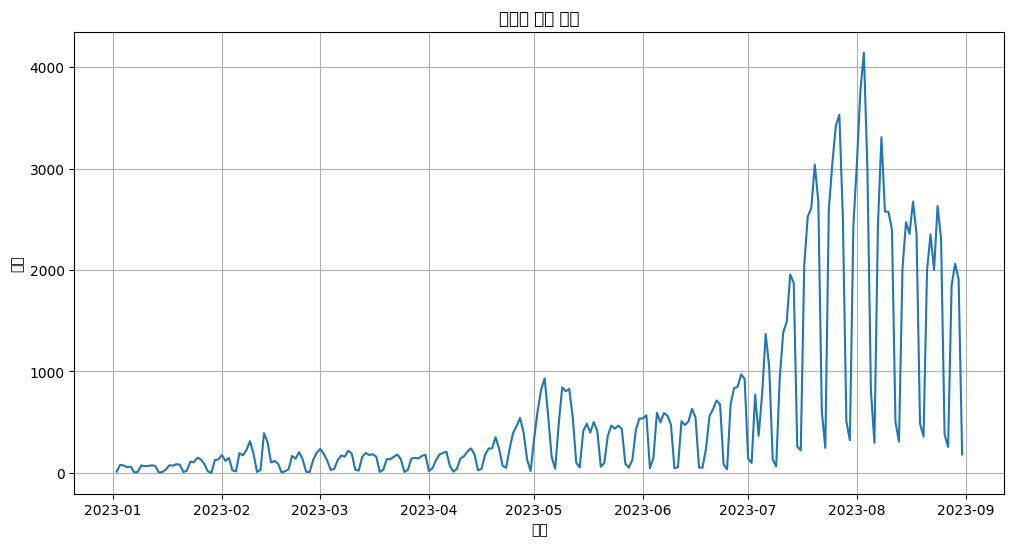

In [38]:
# 날짜별 뉴스 건수 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
daily_counts.plot(title="날짜별 뉴스 건수")
plt.xlabel("날짜")
plt.ylabel("건수")
plt.grid(True)
plt.show()

In [39]:
# 범주형 변수 빈도수 분석 (til_ifo, ctgy_cfc_ifo)
print("\ntil_ifo 빈도수:")
print(news['til_ifo'].value_counts())
print("\nctgy_cfc_ifo 빈도수:")
print(news['ctgy_cfc_ifo'].value_counts())


til_ifo 빈도수:
til_ifo
5 Dividend Growth Stocks With Upside To Analyst Targets                                     86
5 Dividend Aristocrats Where Analysts See Capital Gains                                     58
3 Stocks to Avoid This Week                                                                 49
3 Top Dividend Stocks to Maximize Your Retirement Income                                    49
Improve Your Retirement Income with These 3 Top-Ranked Dividend Stocks                      46
                                                                                            ..
Wall Street slips as investors eye Russia, more Fed hikes                                    1
GLOBAL MARKETS-Stocks down, gold up after aborted Russian mutiny ignites safe-haven push     1
Why Ameren (AEE) is a Great Dividend Stock Right Now                                         1
Corning (GLW) Declares $0.28 Dividend                                                        1
Bain Capital Specialty Finan